<a href="https://colab.research.google.com/github/piziomo/Generative-AI-Trainings/blob/main/CNN_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week 02: Introduction to convolutional neural nets
**Welcome** to the second IM954 lab!

This week you will be introduced to a deep learning model that helped to advance computer vision research -- **convolutional neural networks** or convnets. *Convolution* refers to the idea of one thing sliding over another; this might make little sense now, but you should understand why the model is called convolutional by the end of this lab :)

### Learning outcomes for this week

By the end of this session, you should:
1. have an understanding what convnets are;
2. know how to implement convnets in Keras (following the instructions!);


## What is a convolutional neural network?

Convolutional neural network (CNN or convnet) is an approach to dealing with multidimensional information, such as images.


Do you remember this activation layer from the lab in week 01? It is not super informative in understanding what patterns that model learnt to associate with particular labels.


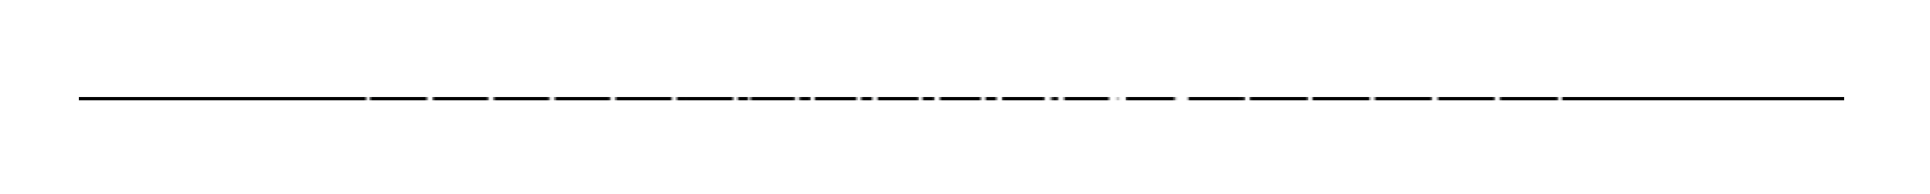

(Dense layer activations in a multi-layer perceptron)

CNNs have a couple of advantages over the neural networks we build in week 01:
1. CNNs are *translation-invariant*
  - CNNs can learn specific patterns that can be recognized anywhere in the image. Densly connected layers, however, have to learn about each unique location of a pattern.
2. CNNs can learn *spatial hierarchies* of patterns
  - for instance, the first convulational layer might learn to detect edges, a second convnet might learn more abstract patterns based on the features of a previous layer, etc.


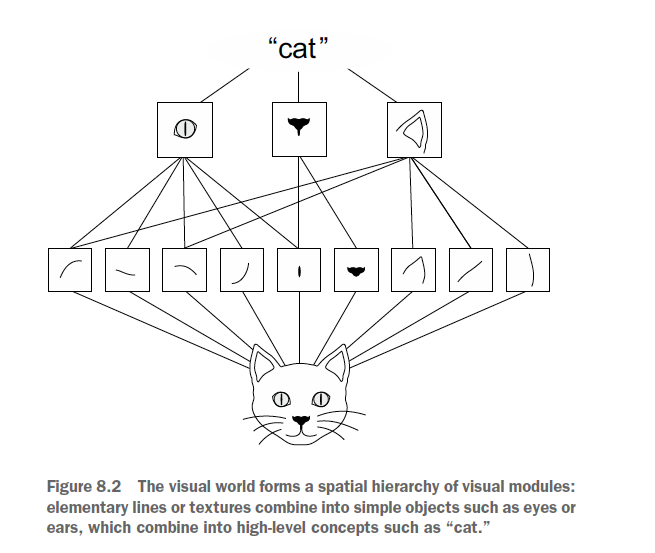
(Chollet 2021, p.205)

Now you know the advantages of the convolutional neural networks, let's build a model that has at least one convolutional layer. As in the previous week, we will use the MNIST dataset to build a multilabel classifier.

We will build a model that will have an architecture as depicted below. It might look complex, but we will break it down into little steps :)



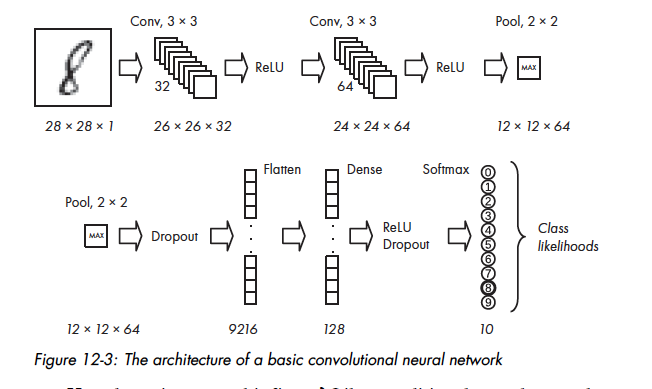
(Kneusel 2021, p.287)



In [ ]:
# this is how the above architecture (Figure 12-3) looks like in code


'''
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import Model
from tensorflow import keras

inputs = Input(shape = (28,28,1))

layer_cnn1 = Conv2D(filters = 32, # number of filters
                  kernel_size = (3, 3), # kernel size
                  strides = 1,
                  activation='relu')(inputs) # specify an activation function
layer_cnn2 = Conv2D(64, # number of filters
                  (3, 3), # kernel size
                   activation='relu')(layer_cnn1)
maxp = MaxPooling2D(pool_size=(2,2))(layer_cnn2)
dropout1 = Dropout(0.25)(maxp)
layer_flatten = Flatten()(dropout1)
layer_dense = Dense(128, activation = "relu")(layer_flatten)
dropout2 = Dropout(0.5)(layer_dense)
outputs = Dense(10,
                activation = "softmax"
                )(dropout2)

model = keras.models.Model(inputs = inputs,
                     outputs = outputs)

'''


'\nimport tensorflow as tf\nfrom tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense\nfrom tensorflow.keras import Model\nfrom tensorflow import keras\n\ninputs = Input(shape = (28,28,1))\n\nlayer_cnn1 = Conv2D(filters = 32, # number of filters\n                  kernel_size = (3, 3), # kernel size\n                  strides = 1,\n                  activation=\'relu\')(inputs) # specify an activation function\nlayer_cnn2 = Conv2D(64, # number of filters\n                  (3, 3), # kernel size\n                   activation=\'relu\')(layer_cnn1)\nmaxp = MaxPooling2D(pool_size=(2,2))(layer_cnn2)\ndropout1 = Dropout(0.25)(maxp)\nlayer_flatten = Flatten()(dropout1)\nlayer_dense = Dense(128, activation = "relu")(layer_flatten)\ndropout2 = Dropout(0.5)(layer_dense)\noutputs = Dense(10,\n                activation = "softmax"\n                )(dropout2)\n\nmodel = keras.models.Model(inputs = inputs,\n                     outputs = outputs)\n\n'

## Data preparation (MNIST classifier)

Last week we spent quite a bit of time exploring how to prepare data for a single-layer perceptron or a multi-layer perceptron that is made up only of fully-conntected (dense) layers. In particular, we reshaped the input image from a 2D tensor (matrix) to a 1D tensor (vector) as well as normalised the values to be in the interval between 0 and 1.

It will be *slightly* different this time. The first layer in our model will be a convolutional layer, thus we will not vectorise our data, but we still have to normalise it.

Additionally, we will convert the labels to a tensor to introduce you to **one-hot encoding** or categorical encoding.

Why is it helpful to convert our labels to a tensor? There are a few reasons. First, it is a way to turn categorical values (e.g. colour categories) numeric, which is a type of data that a machine learning model 'understands'. Second, it helps improve model performance.

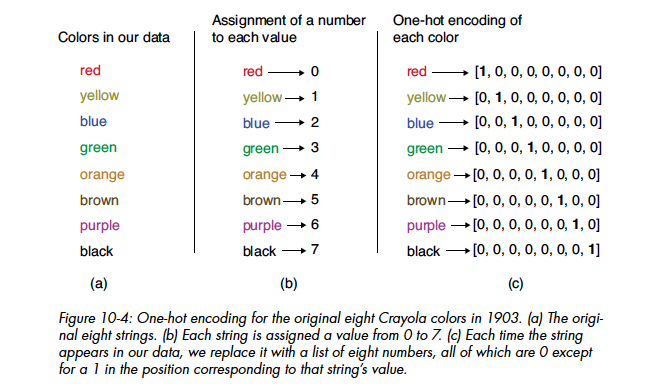
(Glassner 2021, p.227)

<br>

> Important: depending on how you handle the labels in multi-class classification tasks, you will have to choose a different loss function. If you encode labels as integers (see Week 01) then use `sparse_categorical_crossenthropy`. If you opt in for one-hot encoding then you `categorical_crossentropy`. This week you will be introduced to one-hot encoding.

In [ ]:
import IPython.display as display
import PIL.Image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist

In [ ]:
# Importing and preparing data

# import the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# train and test images
train_images_resh = train_images.astype("float32") / 255 # re-scaling and
# conversion to float32
test_images_resh = test_images.astype("float32") / 255

# one-hot encoding
train_labels_resh = keras.utils.to_categorical(train_labels, # data
                                               10) # number of categories
test_labels_resh = keras.utils.to_categorical(test_labels, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Let's see whether the labels were encoded as expected
print(test_labels[0])
print(test_labels_resh[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


1


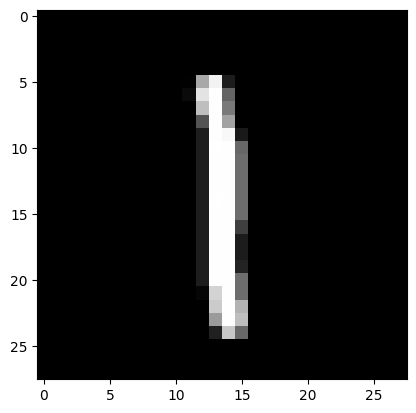

In [ ]:
print(train_labels[14])

plt.imshow(train_images[14], cmap="gray")

## Model architecture



### Input layer

First we will build an input layer. This layer will "tell" the model what kind of data it should expect, in our case it will be 28x28x1 (height, width, number of colour channels). We are working with the grayscale images which have only 1 colour channel. RGB images have 3 channels (red, green, and blue).

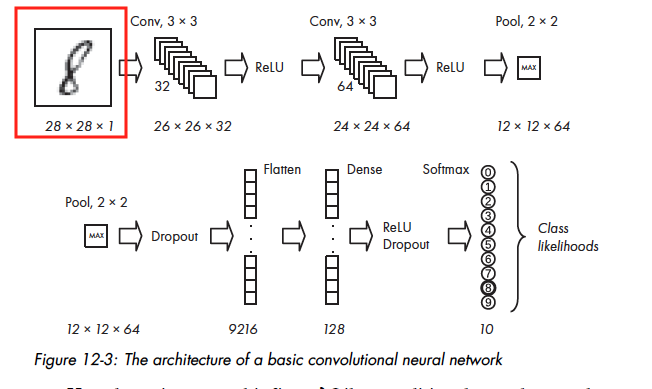

In [ ]:
# let's create an input variable
inputs = Input(shape = (28,28,1))

### Convolutional layer 1

Now, we will create our first convolutional layer. We will provide the following information:
- input layer
- the number of filters
- filter (or kernel) size
- activation function

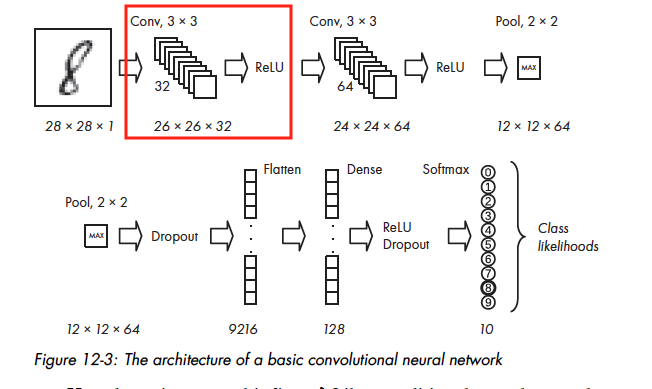

A **filter** encodes specific aspects about the data. In our case, an MNIST digit image (input shape: 28x28x1) will go into the convolutional layer as an input and the layer will produce an output of shape 26, 26, 32. The output will be slightly smaller, but with many more channels (32).
- A comparison of a convolutional layer to an image processed in Adobe Photoshop (PS) might be helpful: when editing an image in PS, you usually work with different layers that have a particular function, such as increasing sharpness; in a convolutional layer, each filer also is supposed to capture something about that image, e.g. edges, we just don't know what it is until we visualise the layers. We will do this later!

A **kernel** is used to slide over the input image to create filters. Essentially, a kerner is a matrix of weights. Usually, kernel size is 3x3 or 5x5.
- Another PS analogy: you can think of a kernel sliding over an input as if you're sliding over an image to add blur to your image.

**Activation functions** introduce non-linearity into our model. The most common activation functions for CNNs are `relu` and `LeakyReLU`.
- Basically, an activation function takes a floaoting-point digit as its input and returns a new floating-point digit output.

#### What is going on in a convolutional layer?

The output of our convolutional layer is a *smaller* 2D tensor but with more feature maps. To help us understand this, let's look at the illustration below.

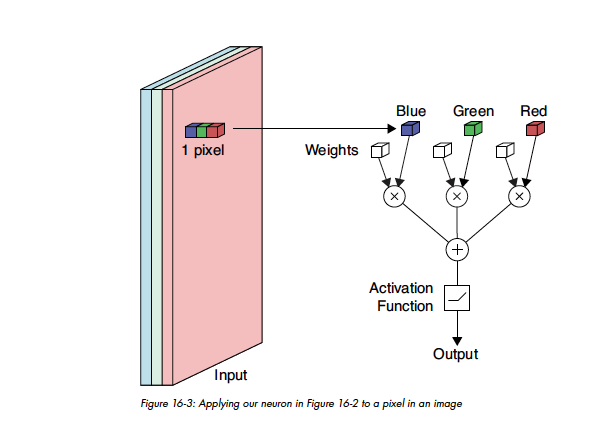

We have an input image of 3 channels (it's an RGB image). For each pixel we extract three numbers in the same location from the red, green, and blue channels. Each of that number is multiplied by a random number, which is called a weight. The three new numbers are added up and passed through an activation function producing an "output" number. This procedure is repeated for every pixel in an image. This results in a new tensor with the same height and width as our input image, but has only one channel. In other words, a feature map was produced (see below).

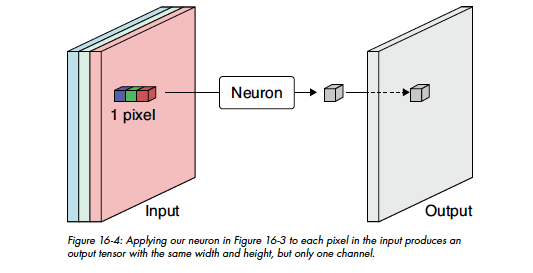

If we wanted to produce more feature maps, let's say 32, then the same process would be repeated 32 times, *but* a different weight value.

In our model's case, however, we use a *kernel*, which is a matrix of weights, to produce a single scalar (a single number) that will make up a feature map. We **convolve** an image with a filter.

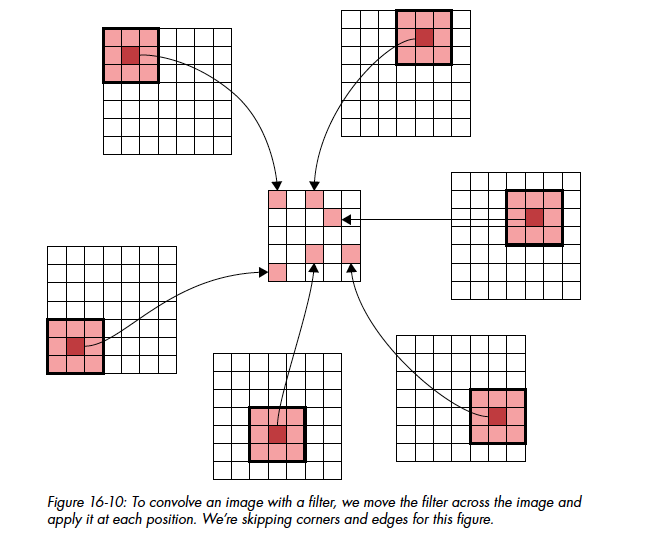
> The example shows a convolution over a grayscale image.

An example of how a value (pixel) is produced when a 3x3 kernel is applied to a) a grayscale image and b) an RGB image is demonstrated below.










In [ ]:
layer_cnn1 = Conv2D(filters = 32, # number of filters
                  kernel_size = (2, 2), # kernel size
                  strides = 1,
                  activation='relu')(inputs) # specify an activation function

### Convolutional layer 2

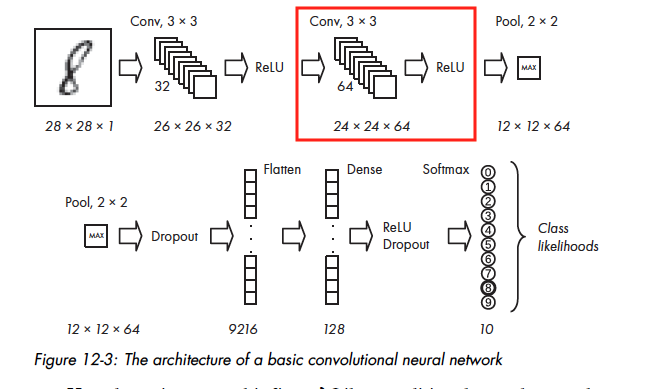

It is common for the subsequent convolutional layers to have a higher number of filters because the input shape often shrink. For instance, the output shape of a single feature map from the first convolutional layer is of size 26x26 instead of 28x28. This is an effect of applying a kernel shrinks an input image by 2 pixels, thus creating the so-called **border effect**. There are ways to address this by, for instance, "padding" an input image. **Padding** consists of adding an appropriate number of rows and columns on each side of an input image in a way that allows the convolutional kernel to fit around each input tile (for more see Chollet (2021, pp.207-208).

In [ ]:
layer_cnn2 = Conv2D(64, # number of filters
                  (2, 2), # kernel size
                   activation='relu')(layer_cnn1)

In [ ]:
layer_cnn3 = Conv2D(128, # number of filters
                  (2, 2), # kernel size
                   activation='relu')(layer_cnn2)

### MaxPooling layer

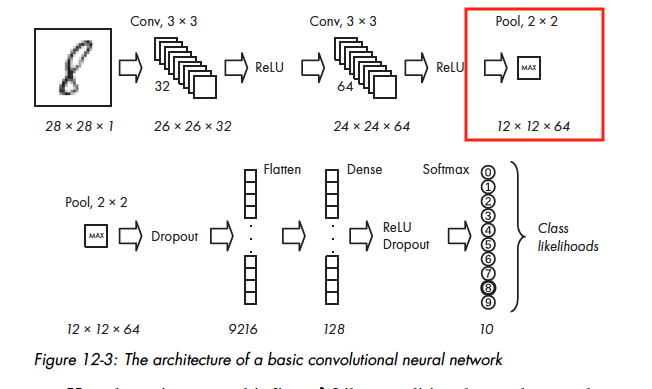

A **MaxPooling layer** is a technique to *downsample* (reduce) our feature maps. It helps the model to recognise a pattern even if its displaced, thus reducing the potential of our model overfiting (do better on a training data that testing data). For example, in an image, an ear of a cat might be captured in a variety of ways. MaxPooling helps to address this variation.

You can think of this technique as a way to generate a more "summarised" version of a feature map that captures the most important elements.

In [ ]:
maxp = MaxPooling2D(pool_size=(2,2))(layer_cnn3)

In [ ]:
layer_cnn4 = Conv2D(128, # number of filters
                  (2, 2), # kernel size
                   activation='relu')(maxp)

### Dropout layer 1

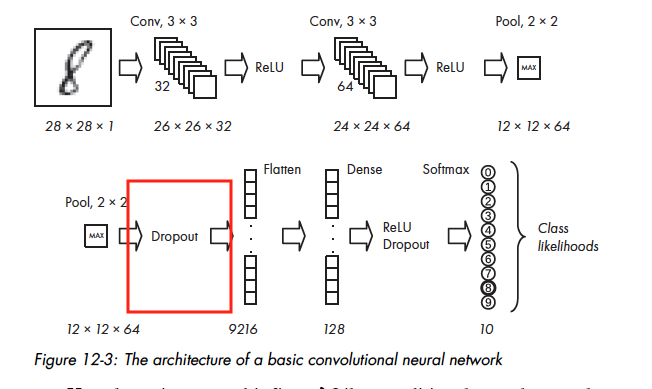

A **dropout** is a regularisation technique to "fight" overfitting by setting a random number of units to zero. The aim of a dropout is to ensure that a network doesn't become *too* reliant on a group of units in making a prediction.

You can think of it in this way: you are working on the past papers in preparation for an exam. However, it is not enough to simply memorise the answers in the past papers, because if you encounter a question formulated slightly differently, you might not be able to answer it -- you did not memorise it, thus you don't know the answer. In other words, memorisation is not understanding that would allow you to generalise.

This is what a dropout does -- it drops some information in order to minimse the "memorisation" problem. Instead, it aims to have the information spread more evenly across the network.



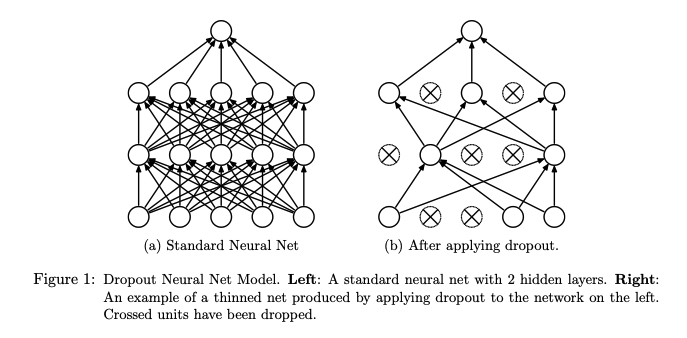
(Srivastava et al. 2014)

In [ ]:
dropout1 = Dropout(0.25)(layer_cnn4)

### Flattening layer

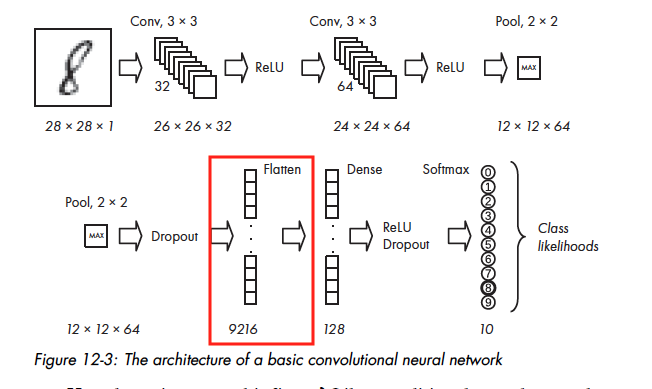

Do you remember that in the previous lab we built a model that was made up of Dense layers? To train a model we had to vectorise our input data, i.e. to transform input images from 28 by 28 to 784 by 1. This is exactly what this layer does. You can think of it as data preparation layer for a Dense layer that we will add right after this layer.

In [ ]:
layer_flatten = Flatten()(dropout1)

### Dense layer

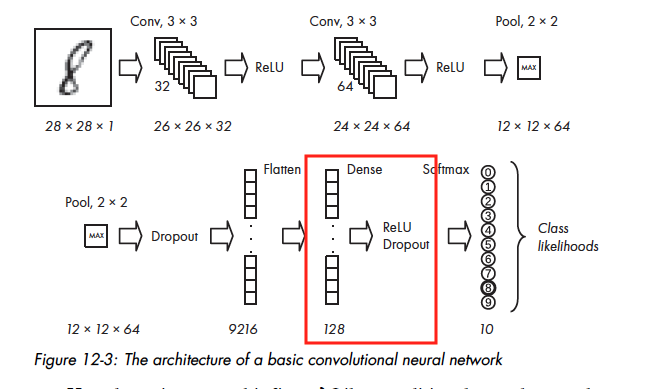

In [ ]:
layer_dense = Dense(128, activation = "relu")(layer_flatten)

### Dropout layer 2

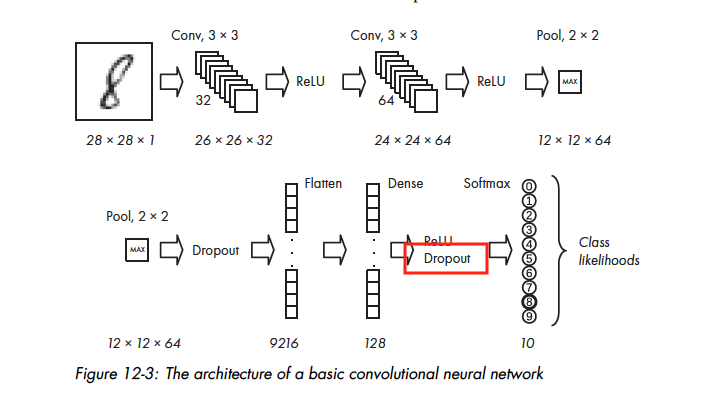

In [ ]:
dropout2 = Dropout(0.5)(layer_dense)

### Outputs layer

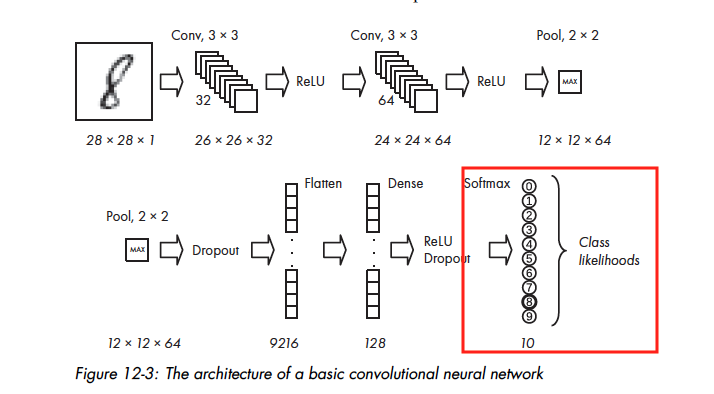

In [ ]:
outputs = Dense(10,
                activation = "softmax"
                )(dropout2)

### Final model

In [ ]:
'''
inputs = Input(shape = (28,28,1))
layer_cnn1 = Conv2D(filters = 32, # number of filters
                  kernel_size = (2, 2), # kernel size
                  strides = 1,
                  activation='relu')(inputs) # specify an activation function
layer_cnn2 = Conv2D(64, # number of filters
                  (2, 2), # kernel size
                   activation='relu')(layer_cnn1)
layer_cnn3 = Conv2D(128, # number of filters
                  (2, 2), # kernel size
                   activation='relu')(layer_cnn2)
maxp = MaxPooling2D(pool_size=(2,2))(layer_cnn3)
dropout1 = Dropout(0.25)(maxp)
layer_flatten = Flatten()(dropout1)
layer_dense = Dense(128, activation = "relu")(layer_flatten)
dropout2 = Dropout(0.5)(layer_dense)
outputs = Dense(10,
                activation = "softmax"
                )(dropout2)

                '''

# Let's build a model
model = keras.models.Model(inputs = inputs, # specify the inputs layer (first layer in the model)
                     outputs = outputs) # specify the outputs layer (last layer in the model)

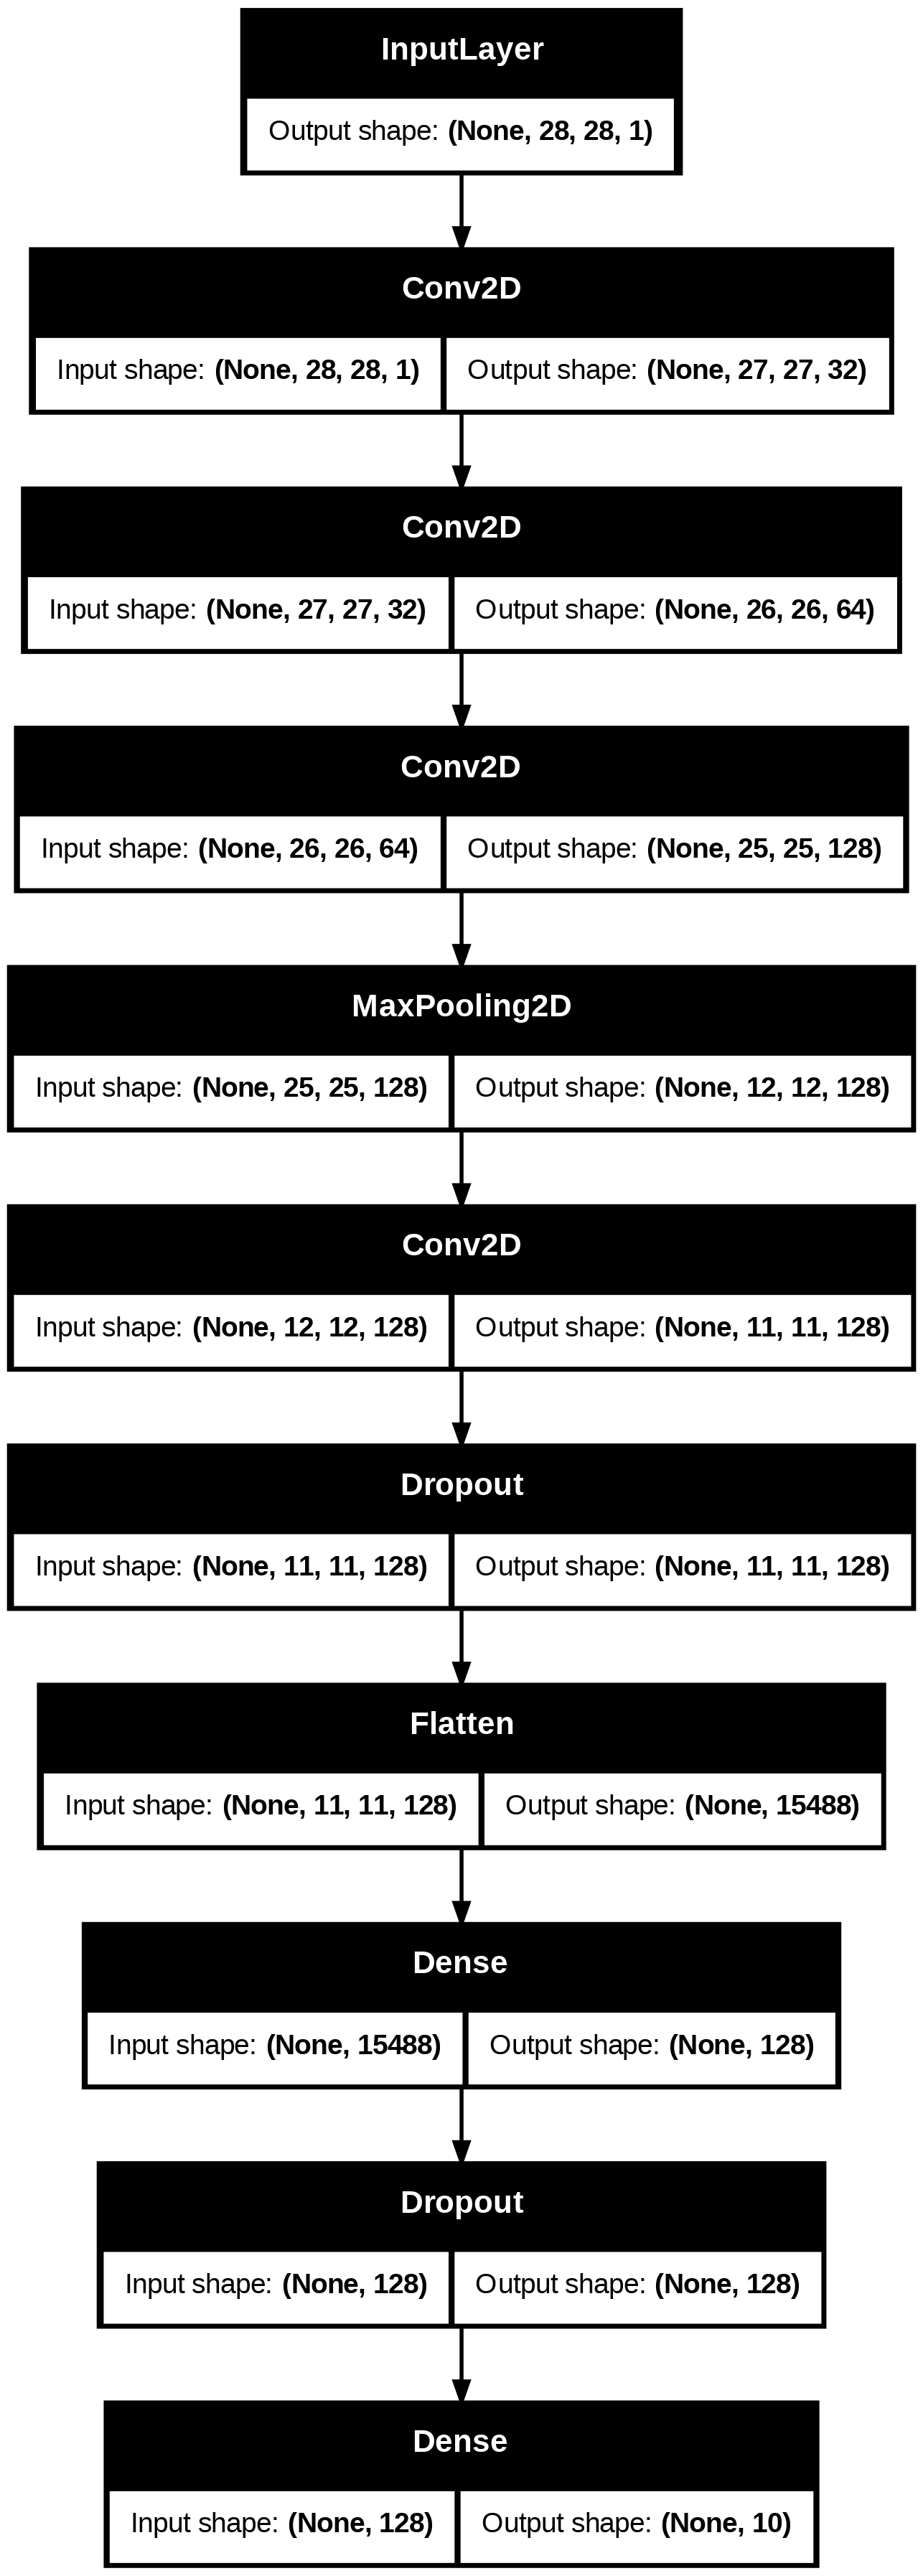

In [ ]:
# We can visualise our model architecture as a graph
keras.utils.plot_model(model,
                       show_shapes = True)

# model.summary()


## Model compilation and training

A reminder a compilation step definese how our model learns.

An optimizer: the mechanism through which the model updates itself based on the training data it sees, so as to improve its performance.

A loss function: Used to measure the model's performance on the training data, and thus, how it will be able to steer itself in the right direction.

Metrics are monitored during training and testing to understand how our model performs. In this case, we pick accuracy, which is the fraction of the images that were correctly classified.

In [ ]:
model.compile(
    optimizer="rmsprop",
    loss='categorical_crossentropy',
    metrics=['accuracy']) # our success metric is the number of correct digit classifications

# training
model.fit(train_images_resh, train_labels_resh, batch_size = 1024, epochs = 5)


Epoch 1/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 13s 140ms/step - accuracy: 0.7481 - loss: 0.7891
Epoch 2/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9606 - loss: 0.1365
Epoch 3/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.9794 - loss: 0.0710
Epoch 4/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.9840 - loss: 0.0518
Epoch 5/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.9860 - loss: 0.0457


In [ ]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 27, 27, 32)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 25, 25, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 11, 11, 128)         │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,982,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,181,718 (15.95 MB)

 Trainable params: 2,090,858 (7.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,090,860 (7.98 MB)

## Model evaluation

In [ ]:
model.evaluate(test_images_resh,
               test_labels_resh)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9891 - loss: 0.0312


[0.025341331958770752, 0.9915000200271606]

## Plotting the incorrectly guessed digits

To understand model behaviour, it might be useful to plot the digits which our model guessed incorrectly.

For this, we will use the `predict()` function instead of `evaluate()`.
- prediction informs us about the probability that a test_image belongs to a particular class (i.e. is a digit of class 0). The higher the probability, the more likely the image is of that particular class.
- evaluation, on the other hand, does not return individual predictions. It is used to understand if a model underfits or overfits.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[259 321 445 582 684 691 717 720 740 844]


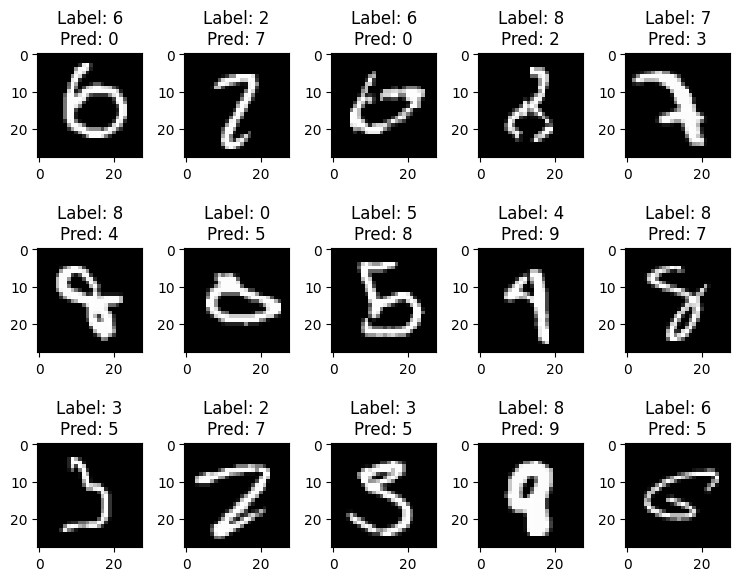

In [ ]:
# all predictions
predictions = model.predict(test_images_resh)
final_predictions = np.argmax(predictions, axis=1)

# subsetting the incorrect predictions, i.e. the test label did not match
# the predicted one
# importantly, we will create the indices (locations in a dataset) of the
# incorrect labels, so we can match this with the labels and images in the
# testing data
(incorrects,) = np.nonzero(final_predictions != test_labels)
print(incorrects[0:10])

# we will plot only 15 incorrect digits
num = 15
incorrect_indices = incorrects[0:num]
num_row = 3
num_col = 5

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    incorrect_index = incorrect_indices[i]
    ax = axes[i//num_col, i%num_col]
    ax.imshow(test_images[incorrect_index], cmap='gray')
    ax.set_title('Label: {}\nPred: {}'.format(*[test_labels[incorrect_index], final_predictions[incorrect_index]]))
plt.tight_layout()
plt.show()

## Visualising model activations

You might be interested in visualising the **activations**. You can think of activations in this way: the higher the activation number, the brighter it is. 0 means that a neuron is not active while 1 means that a neuron is active and, likely, holds important information about the data.

In this section we will visualise several layers of the model we just built, trained, and evaluated.

In [ ]:
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	print(i, layer.name, layer.output.shape)

0 input_layer_1 (None, 28, 28, 1)
1 conv2d_3 (None, 27, 27, 32)
2 conv2d_4 (None, 26, 26, 64)
3 conv2d_5 (None, 25, 25, 128)
4 max_pooling2d_1 (None, 12, 12, 128)
5 conv2d_6 (None, 11, 11, 128)
6 dropout_4 (None, 11, 11, 128)
7 flatten_2 (None, 15488)
8 dense_4 (None, 128)
9 dropout_5 (None, 128)
10 dense_5 (None, 10)


### First activation layer (input)

In [ ]:
model_layer1 = keras.models.Model(inputs=model.inputs, outputs=model.layers[0].output)

feature_maps_layer1 = model_layer1.predict(np.expand_dims(test_images_resh[0],0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


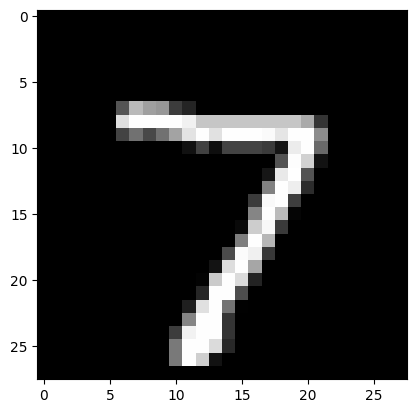

In [ ]:
# First layer aka an input
square = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplots(square, square)
		#ax.set_xticks([])
		#ax.set_yticks([])ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps_layer1[0, :, :], cmap='gray')

### Second activation layer

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


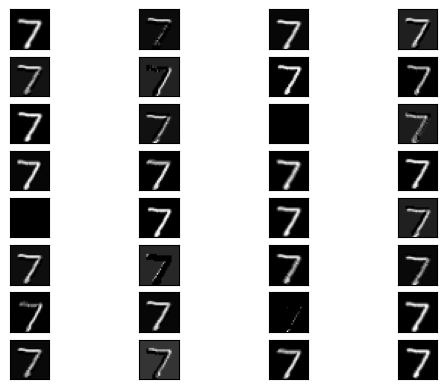

In [ ]:
# Second layer

from matplotlib import pyplot

model_layer2 = keras.models.Model(inputs=model.inputs, outputs=model.layers[1].output)

feature_maps_layer2 = model_layer2.predict(np.expand_dims(test_images_resh[0],0))

width = 4
length = 8
ix = 1
for _ in range(length):
	for _ in range(width):
		# specify subplot and turn of axis
		ax = pyplot.subplot(length, width, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps_layer2[0, :, :, ix-1], cmap='gray')
		ix += 1
pyplot.show()

### Third activation layer

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


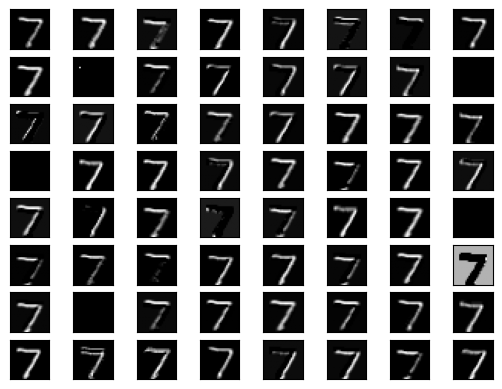

In [ ]:
# Third CNN layer
# from matplotlib import pyplot

model_layer3 = keras.models.Model(inputs=model.inputs, outputs=model.layers[2].output)

feature_maps_layer3 = model_layer3.predict(np.expand_dims(test_images_resh[0],0))

width = 8
length = 8
ix = 1
for _ in range(length):
	for _ in range(width):
		# specify subplot and turn of axis
		ax = pyplot.subplot(length, width, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps_layer3[0, :, :, ix-1], cmap='gray')
		ix += 1
pyplot.show()

### Fifth activation layer

In [ ]:
print(model.layers[4].name, model.layers[4].output.shape)

dropout_2 (None, 12, 12, 64)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


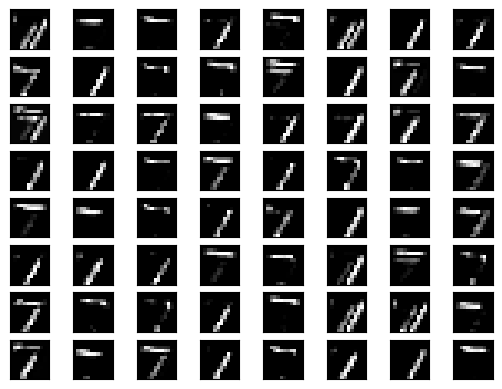

In [ ]:
# Fifth CNN layer
# from matplotlib import pyplot

model_layer5 = keras.models.Model(inputs=model.inputs, outputs=model.layers[4].output)

feature_maps_layer5 = model_layer5.predict(np.expand_dims(test_images_resh[0],0))

width = 8
length = 8
ix = 1
for _ in range(length):
	for _ in range(width):
		# specify subplot and turn of axis
		ax = pyplot.subplot(length, width, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps_layer5[0, :, :, ix-1], cmap='gray')
		ix += 1
pyplot.show()

## Visualisation of Layer 6

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


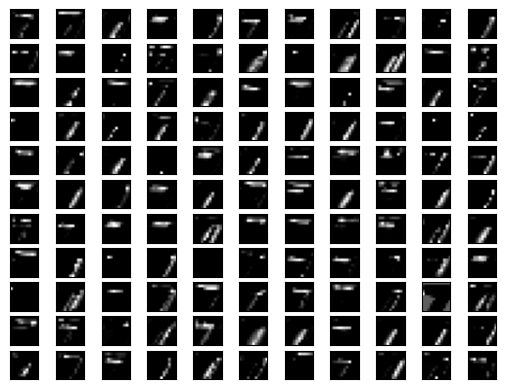

In [ ]:
# 6th CNN layer
# from matplotlib import pyplot

model_layer6 = keras.models.Model(inputs=model.inputs, outputs=model.layers[5].output)

feature_maps_layer6 = model_layer6.predict(np.expand_dims(test_images_resh[0],0))

width = 11
length = 11
ix = 1
for _ in range(length):
	for _ in range(width):
		# specify subplot and turn of axis
		ax = pyplot.subplot(length, width, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps_layer6[0, :, :, ix-1], cmap='gray')
		ix += 1
pyplot.show()

### Eighth activation layer

In [ ]:
print(model.layers[-2].name, model.layers[-2].output.shape)

dropout_3 (None, 128)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


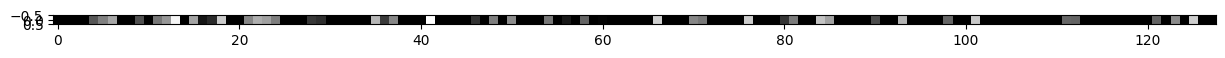

In [ ]:
# Eighth CNN layer
from matplotlib import pyplot

model_layer8 = keras.models.Model(inputs=model.inputs, outputs=model.layers[-2].output)

feature_maps_layer8 = model_layer8.predict(np.expand_dims(test_images_resh[0],0))

width = 1
length = 1

pyplot.figure(figsize=(15, 5))

for _ in range(length):
	for _ in range(width):
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps_layer8[:, :], cmap='gray')

pyplot.show()

### Last activation layer (output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


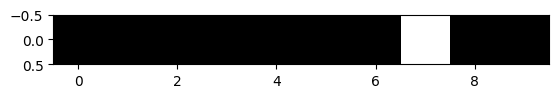

In [ ]:
# Last (output) layer
# from matplotlib import pyplot

model_layer_last = keras.models.Model(inputs=model.inputs, outputs=model.layers[-1].output)

feature_maps_layer_last = model_layer_last.predict(np.expand_dims(test_images_resh[0],0))

width = 1
length = 1
ix = 1
for _ in range(length):
	for _ in range(width):
		# specify subplot and turn of axis
		pyplot.imshow(feature_maps_layer_last[:, :], cmap='gray')
pyplot.show()

## Bonus: CNNs with colour images

CIFAR-10 is a dataset that consists of 60k 32x32 colour images. 50k of those images are training images, the rest (10k) is left for testing. You can learn more about the data here: https://www.tensorflow.org/datasets/catalog/cifar10

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(32, 32, 3)


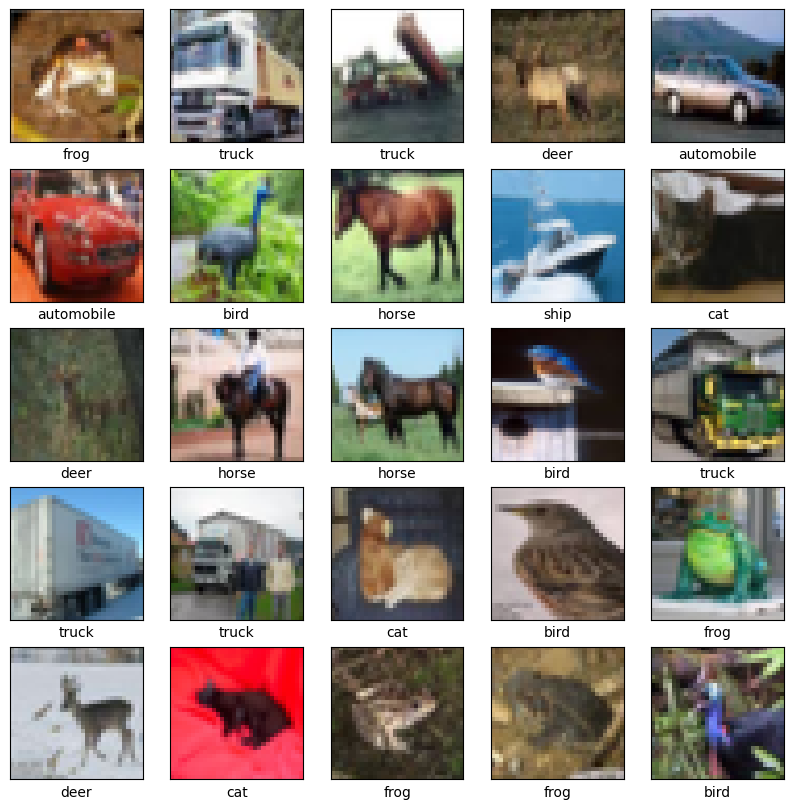

In [ ]:
import IPython.display as display
import PIL.Image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D

# Importing and preparing data

# import the cifar10 dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

print(train_images[44].shape)

# train and test images
train_images_resh = train_images.astype("float32") / 255 # normalisation and
# conversion to float32
test_images_resh = test_images.astype("float32") / 255

# one-hot encoding
train_labels_resh = keras.utils.to_categorical(train_labels, # data
                                               10) # number of categories
test_labels_resh = keras.utils.to_categorical(test_labels, 10)


# visualisation of some images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
# Model architecture
inputs2 = Input(shape = (32,32,3))
layer_cnn1 = Conv2D(filters = 32, # number of filters
                  kernel_size = (3, 3), # kernel size
                  strides = 1,
                  activation='relu')(inputs2) # specify an activation function
layer_cnn2 = Conv2D(64, # number of filters
                  (3, 3), # kernel size
                   activation='relu')(layer_cnn1)
maxp = MaxPooling2D(pool_size=(2,2))(layer_cnn2)
dropout1 = Dropout(0.25)(maxp)
layer_flatten = Flatten()(dropout1)
layer_dense = Dense(128, activation = "relu")(layer_flatten)
dropout2 = Dropout(0.5)(layer_dense)
outputs2 = Dense(10,
                activation = "softmax"
                )(dropout2)
model2 = keras.Model(inputs = inputs2,
                     outputs = outputs2)

# compilation step
model2.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy']) # our success metric is the number of correct digit classifications


In [ ]:
# training
model2.fit(train_images_resh, train_labels_resh, batch_size = 1024, epochs = 5)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 190s 4s/step - accuracy: 0.2220 - loss: 2.1194
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.4203 - loss: 1.6048
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 189s 4s/step - accuracy: 0.4852 - loss: 1.4336
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.5223 - loss: 1.3341
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 201s 4s/step - accuracy: 0.5536 - loss: 1.2601


In [ ]:
# evaluation
model2.evaluate(test_images_resh,
                test_labels_resh)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6222 - loss: 1.1096


[1.1211620569229126, 0.6148999929428101]

**Well done** for reaching the end of this lab!

If you'd like a challenge what about the following tasks:
1. plot the incorrectly guessed categories;
2. visualise activation layers;
3. Share the outputs of your work with Greta and/or the rest of the class via Moodle forum :)

## Resources

**Textbooks:**
- Chollet, F. (2021) Deep Learning with Python. 2nd edn. Manning.
  - chapter 8
- Kneusel, R.T. (2021) Practical Deep Learning: A Python-Based Introduction. San Francisco, CA: No Starch Press.
  - chapter 12
- Glassner, A. (2021) Deep Learning: A Visual Approach. Illustrated edition. San Francisco: No Starch Press.
  - chapter 16
- Foster, D. (2023) Generative Deep Learning: Teaching Machines to Paint, Write, Compose, and Play. 2nd edition. Beijing Boston Farnham Sebastopol Tokyo: Oreilly & Associates Inc.
  - chapters 1 and 2


**Overview of CNNs:**
- Li, Z. et al. (2022) ‘A Survey of Convolutional Neural Networks: Analysis, Applications, and Prospects’, IEEE Transactions on Neural Networks and Learning Systems, 33(12), pp. 6999–7019. Available at: https://doi.org/10.1109/TNNLS.2021.3084827.
- Wang, Z.J., Turko, R., Shaikh, O., Park, H., Das, N., Hohman, F., Kahng, M. & Chau, D.H. (2021) CNN Explainer: Learning Convolutional Neural Networks with Interactive Visualization. IEEE Transactions on Visualization and Computer Graphics. 27 (2), 1396–1406. doi:10.1109/TVCG.2020.3030418.
  - interactive visualisation: https://poloclub.github.io/cnn-explainer/


**One-hot encoding:**
- Glassner, A. (2021) Deep Learning: A Visual Approach. Illustrated edition. San Francisco: No Starch Press.
  - chapter 10, pp. 225-227
- Geeks for Geeks (2024) One Hot Encoding in Machine Learning. Available at: https://www.geeksforgeeks.org/ml-one-hot-encoding/


**Dropout:**
- Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I. & Salakhutdinov, R. (2014) Dropout: a simple way to prevent neural networks from overfitting. The Journal of Machine Learning Research. 15 (1), 1929–1958.
- Labach, A., Salehinejad, H. & Valaee, S. (2019) Survey of Dropout Methods for Deep Neural Networks. arXiv:1904.13310 [cs]. http://arxiv.org/abs/1904.13310.

**Activation layer visualisation**
- Brownlee, J. (2019) How to Visualize Filters and Feature Maps in Convolutional Neural Networks. Available at: https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/